* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

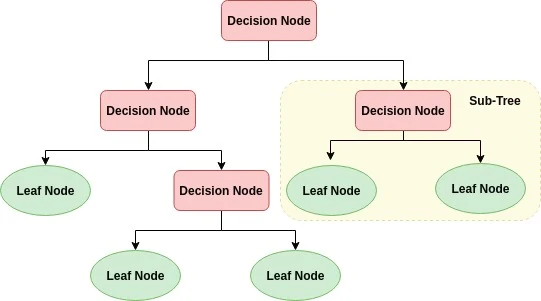

# **Why use Decision Trees?**
There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:

* Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
* The logic behind the decision tree can be easily understood because it shows a tree-like structure.
# Decision Tree Terminologies
* Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
* Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
* Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
* Branch/Sub Tree: A tree formed by splitting the tree.
* Pruning: Pruning is the process of removing the unwanted branches from the tree.
* Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.


# Wheat Seeds Dataset
The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a multiclass (3-class) classification problem. The number of observations for each class is balanced. There are 210 observations with 7 input variables and 1 output variable. The variable names are as follows:

Area.
Perimeter.
Compactness
Length of kernel.
Width of kernel.
Asymmetry coefficient.
Length of kernel groove.
Class (1, 2, 3).

In [ ]:
#mporting required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Files/seeds_dataset (2).csv")

In [ ]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN


In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [ ]:
#dropping the unwanted columns
df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1,inplace=True)

In [ ]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1, 2, 3)            0
dtype: int64

In [ ]:
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


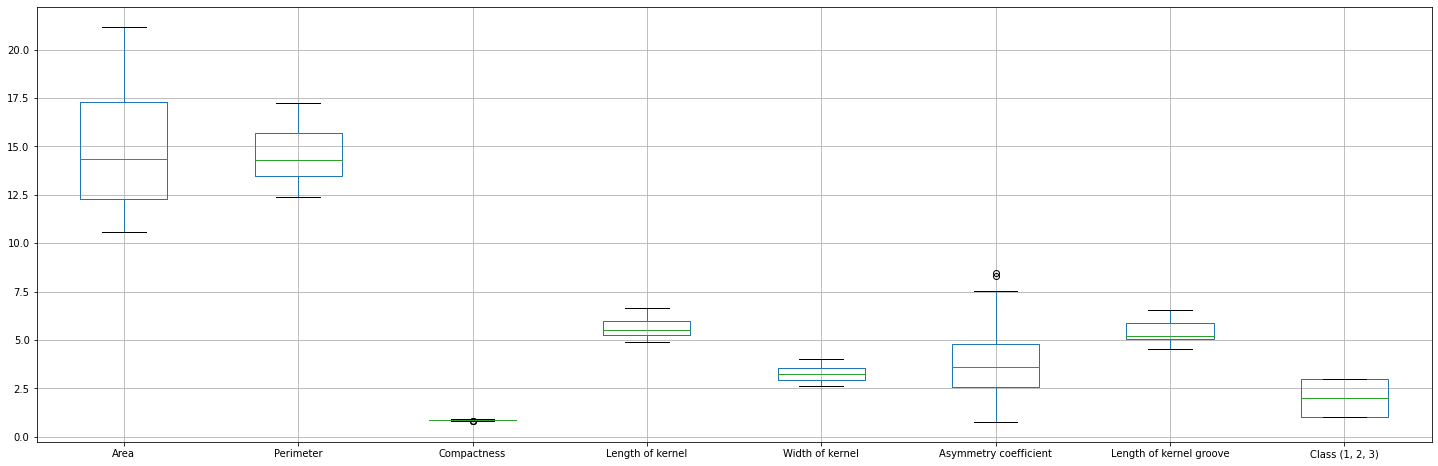

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
df.boxplot()

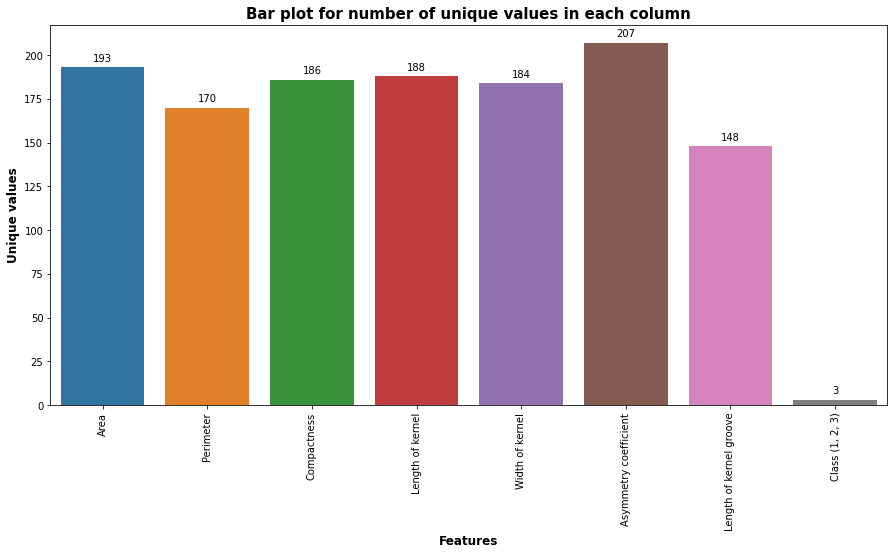

In [ ]:
#Unique Values In Each Feature Coulmn
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

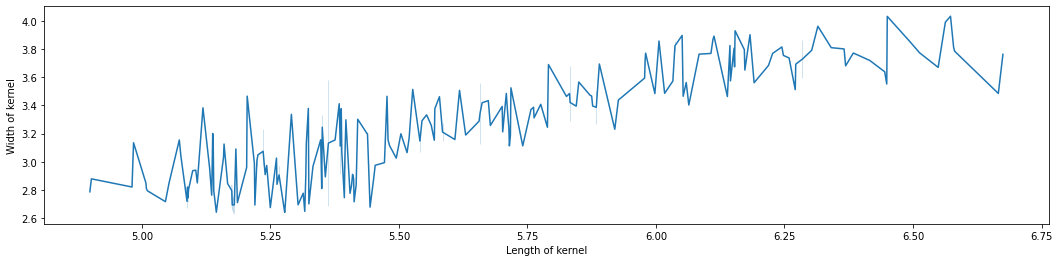

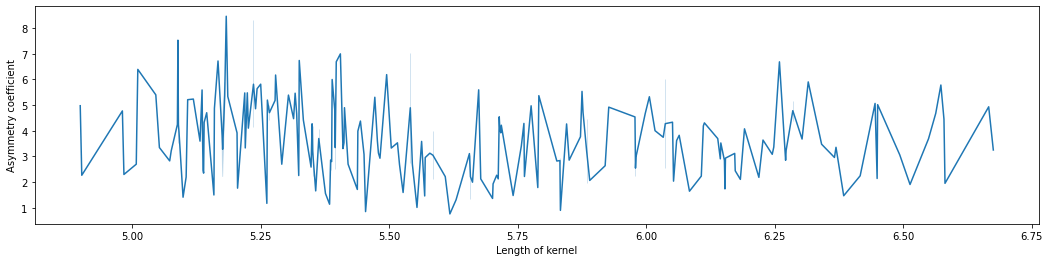

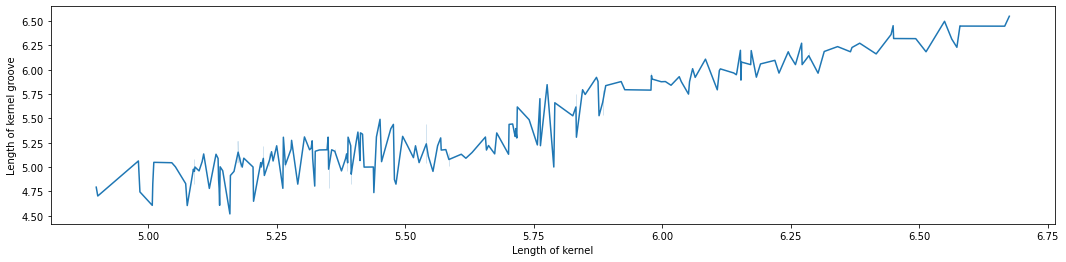

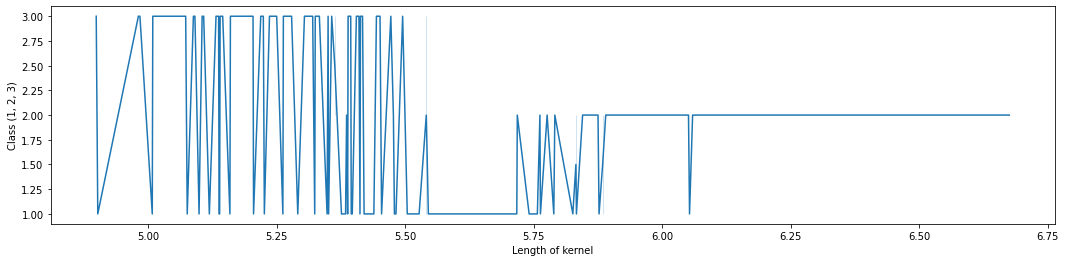

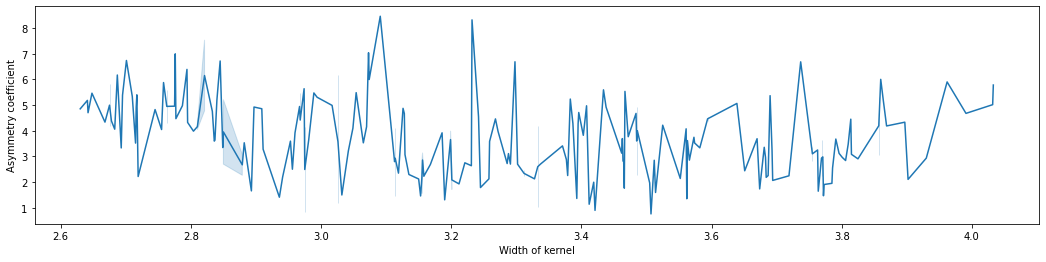

In [ ]:
#ploting the line plot Length of kernel vs Width of kernel and etc
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Width of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Asymmetry coefficient" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Length of kernel groove" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Class (1, 2, 3)" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Width of kernel', y = "Asymmetry coefficient" , data = df)




Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)'],
      dtype='object')

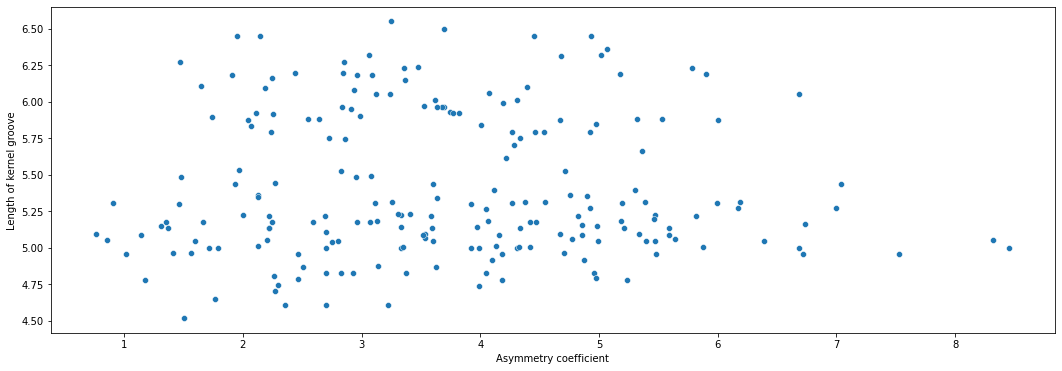

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='Asymmetry coefficient', y ='Length of kernel groove' ,data=df)

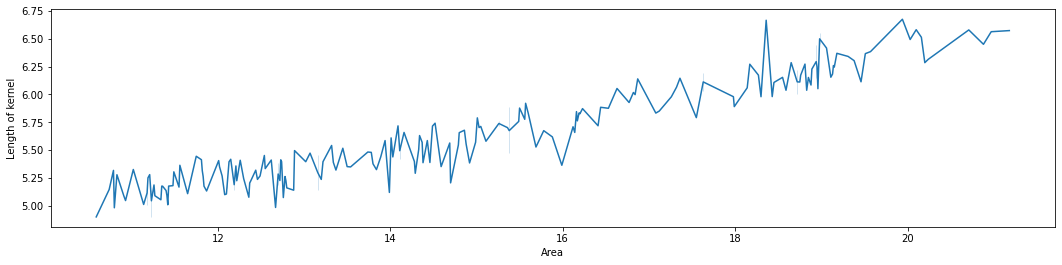

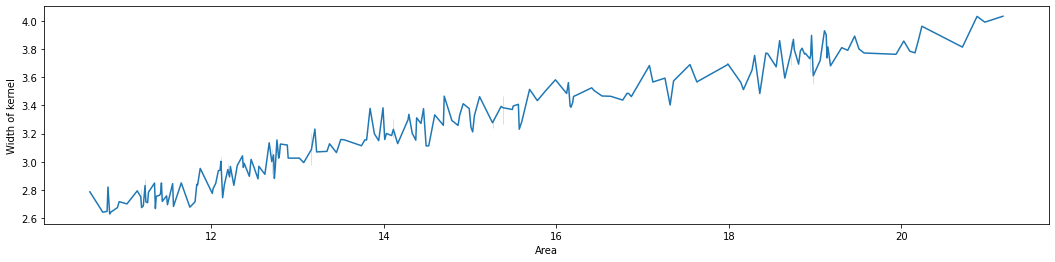

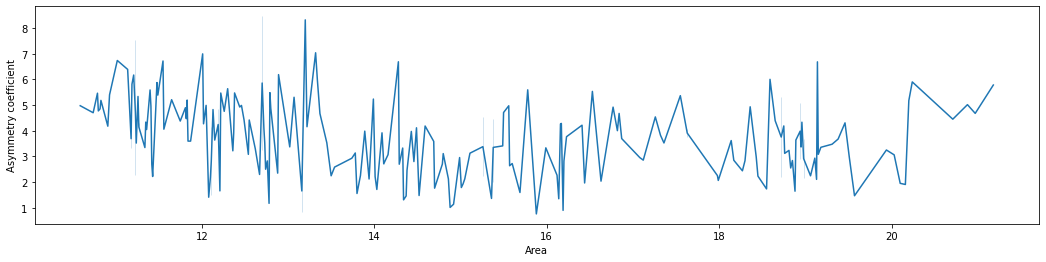

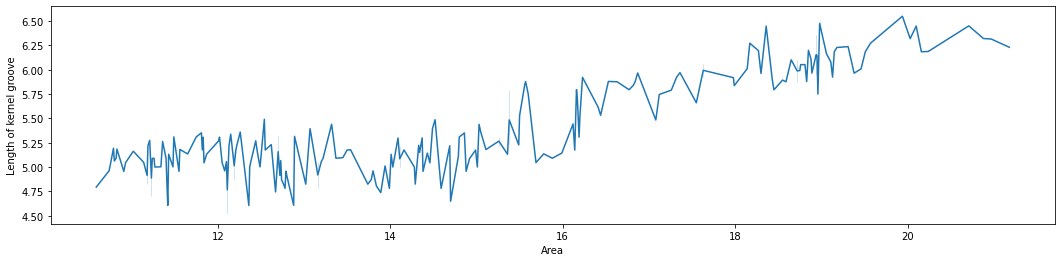

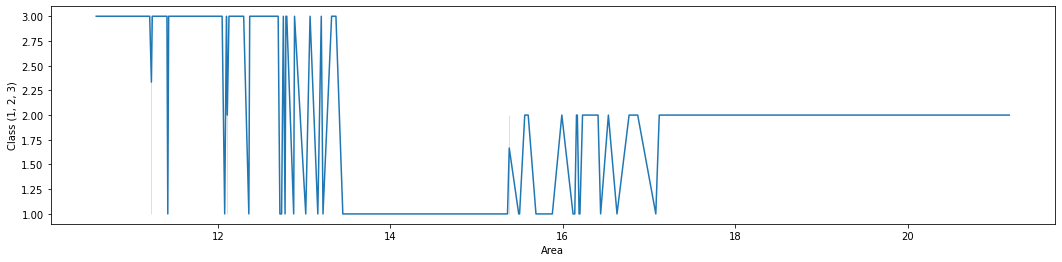

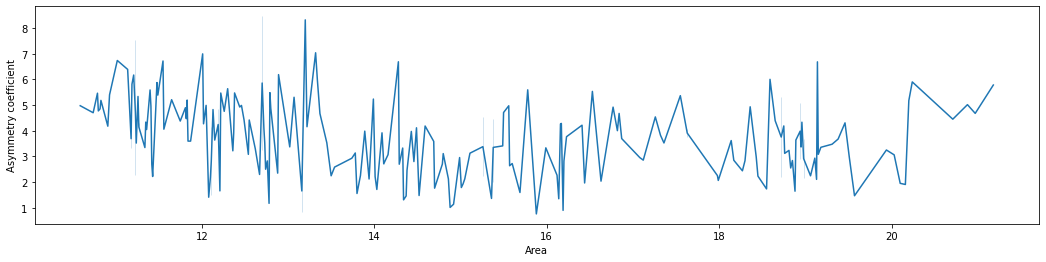

In [ ]:
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Length of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Width of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Asymmetry coefficient" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Length of kernel groove" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Class (1, 2, 3)" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Asymmetry coefficient" , data = df)

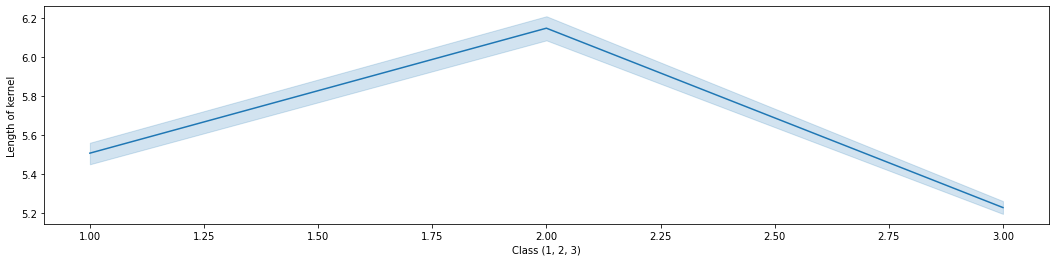

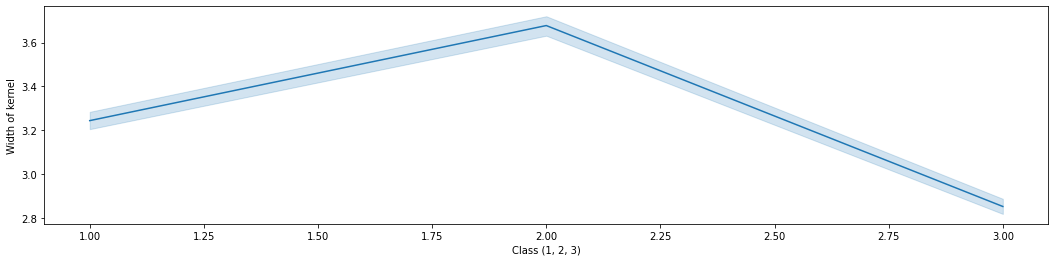

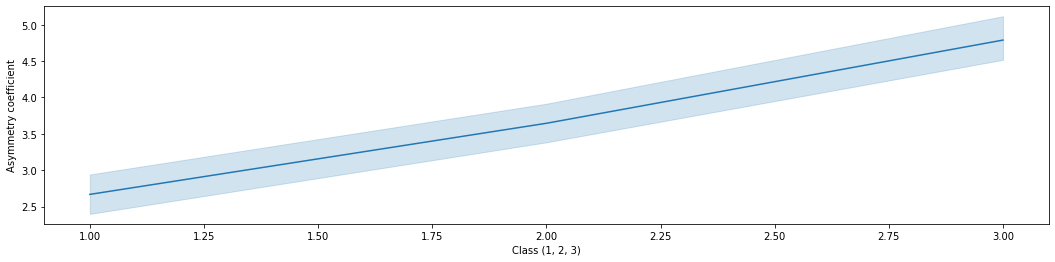

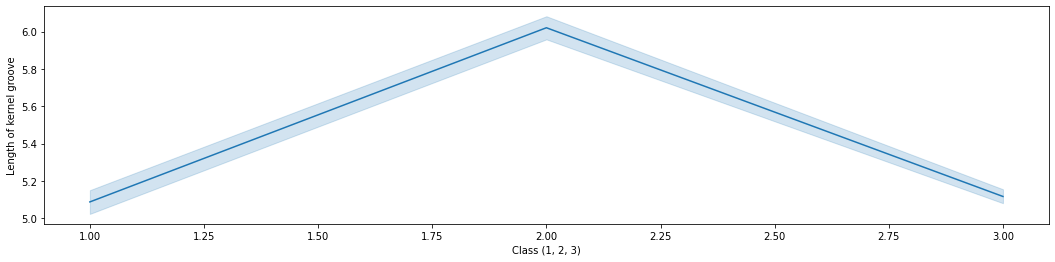

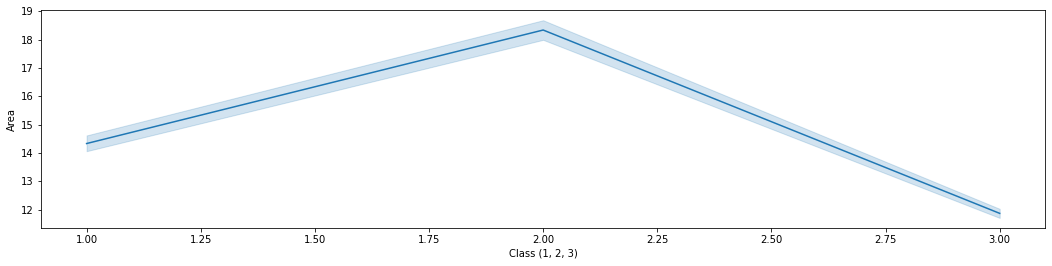

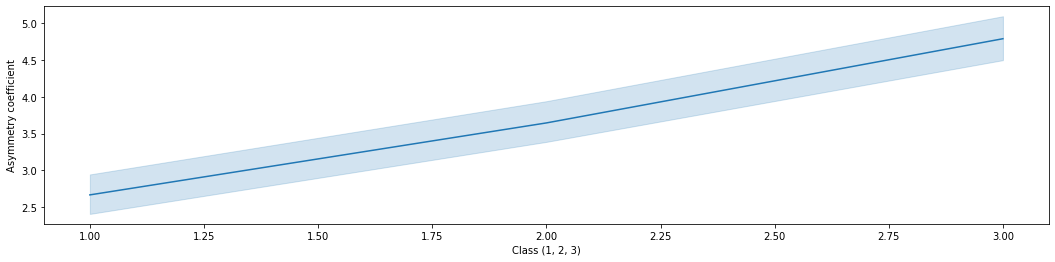

In [ ]:
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Length of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Width of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Asymmetry coefficient" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Length of kernel groove" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Area" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Asymmetry coefficient" , data = df)

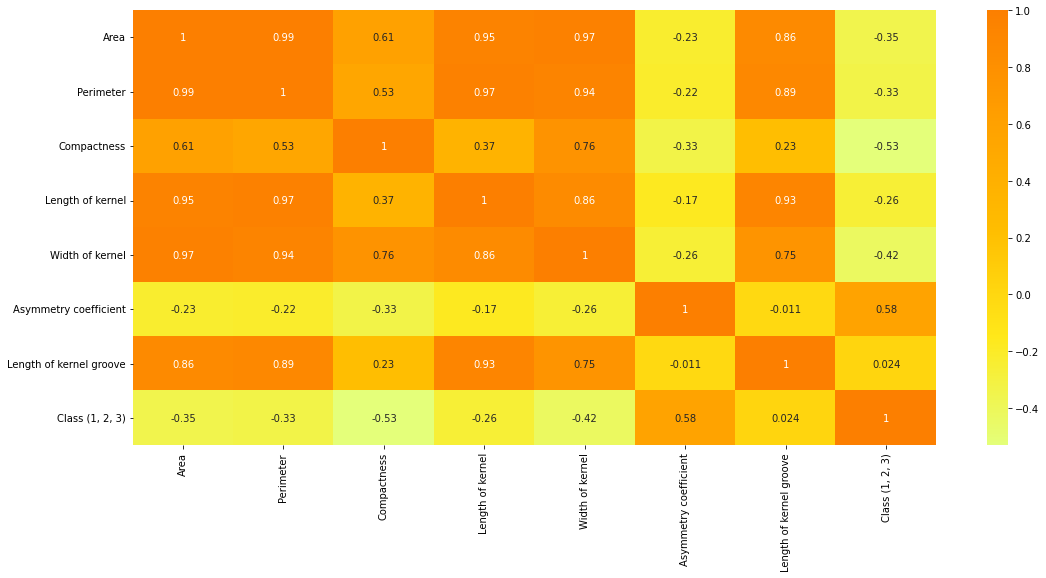

In [ ]:
#correlation plot
#Thier no correlation among variables.
plt.figure(figsize=(18,8))
corr = df.corr()
sns.heatmap(corr , cmap = 'Wistia' , annot = True);

# **Builinding model**

In [ ]:
# Build Machine Learning Model
#Lets create feature matrix X  and y labels
X = df.drop(('Class (1, 2, 3)'),axis=1)
y = df['Class (1, 2, 3)']

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (210, 7)
y shape= (210,)


In [ ]:
X

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: Class (1, 2, 3), Length: 210, dtype: int64

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (168, 7)
X_test dimension=  (42, 7)
y_train dimension=  (168,)
y_train dimension=  (42,)


In [ ]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
"""
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#Model Score

#Check the model score using test data

cls.score(X_test, y_test)

0.9761904761904762

In [ ]:
#Model Score on train data

#Check the model score using test data

cls.score(X_train, y_train)

1.0

[Text(0.640625, 0.9375, 'X[6] <= 5.576\ngini = 0.664\nsamples = 168\nvalue = [50, 61, 57]'),
 Text(0.40625, 0.8125, 'X[0] <= 13.435\ngini = 0.515\nsamples = 108\nvalue = [49, 2, 57]'),
 Text(0.25, 0.6875, 'X[6] <= 4.789\ngini = 0.271\nsamples = 68\nvalue = [11, 0, 57]'),
 Text(0.125, 0.5625, 'X[2] <= 0.893\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(0.0625, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.1875, 0.4375, 'X[0] <= 12.915\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.125, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.375, 0.5625, 'X[5] <= 1.538\ngini = 0.175\nsamples = 62\nvalue = [6, 0, 56]'),
 Text(0.3125, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.4375, 0.4375, 'X[0] <= 12.71\ngini = 0.124\nsamples = 60\nvalue = [4, 0, 56]'),
 Text(0.375, 0.3125, 'gini = 0.0\nsamples = 47\nvalue = [0, 0, 47]'),
 Text(0.5, 0.3125, 'X[5] <= 4.414\ngini 

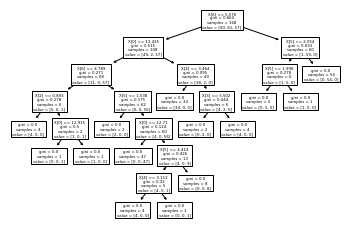

In [ ]:
tree.plot_tree(cls)

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

In [ ]:
#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_pred, y_train)

# R_square
R_square = cls.score(X_train, y_train)
print('The Mean Square Error(MSE) or J(theta) is: ',mse)
print('R square obtain for scikit learn library is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.0
R square obtain for scikit learn library is : 1.0


In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# R_square
R_square = cls.score(X_train, y_train)
print('R square obtain for scikit learn library is :',R_square)

In [ ]:
-

In [ ]:
# sklearn regression module
y_pred_sk_test = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk_test, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)